In [1]:
import keras
import pandas as pd
import numpy as np

Using TensorFlow backend.


# 1. Data Preparation

In [0]:
max_item_id = 10000		# use as a way to constrict memory errors, increase as needed

## 1.1 Playtime Matrix

Source file: User_items.json 

{'user_id': '76561197970982479',
 'items_count': 277,
 'steam_id': '76561197970982479',
 'user_url': 'http://steamcommunity.com/profiles/76561197970982479',
 'items': [{'item_id': '10',
 'item_name': 'Counter-Strike',
 'playtime_forever': 6,
 'playtime_2weeks': 0},
 {'item_id': '20',
 'item_name': 'Team Fortress Classic',
 'playtime_forever': 0,
 'playtime_2weeks': 0},}
 
 
 We reorganize it as a user_item matrix. This is the main input layer.

In [0]:
# import json
# import pandas as pd
# import ast
# import numpy as np
# from collections import OrderedDict
# from sklearn.preprocessing import MinMaxScaler

# filepath = './user_items.json'
# writefilepath = './user_items_playtime_' + str(max_item_id) + '.csv'

# data = []
# game_ids_valid = set()	# We only want to have game ids that appear in any user's game list

# num_games_considered = 0 # Just for profiling
# num_valid_users = 0		# Also profiling

# count = 0
# with open(filepath,encoding='gb18030',errors='ignore') as f:
# 	for line in f:
# 		l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes

# 		# Don't consider a user that doesn't own any games
# 		if int(l["items_count"]) > 0:		
# 			games = l["items"]
# 			games_filter = []
# 			for g in games:
# 				playtime = g["playtime_forever"]
# 				if playtime > 0:	# Also don't consider games not played
# 					game_id = int(g["item_id"])
# 					if game_id <=  max_item_id: 		# Set limit on games due to space
# 						games_filter.append({game_id: playtime})
# 						game_ids_valid.add(game_id)
# 						num_games_considered += 1

# 			if len(games_filter) >= 1:		
# 				num_valid_users += 1	
# 				data.append({l["user_id"]: games_filter})
        
# 		#count = count+1
# 		#print(count)

        

# print(max_item_id)
# print(num_games_considered)
# print(len(game_ids_valid))
# print(num_valid_users)

10000
455810
354
61808


In [0]:
# # Now with format as data (list of nested JSON objects) = 	[	{user_id: [	{item_id: playtime_forever}		]	}	]
# # Convert to dataframe where
# #		item_id		0		..		max_item_id		
# #  user_id 			
# #	x1				playtime_forever
# #	...
# #	xn
# #
# # 
# # Create list of game_id's only based on the valid game ids
# game_list = list(game_ids_valid)
# game_list = sorted(game_list)
# print(*game_list)
# games_dict = OrderedDict()

# df = pd.DataFrame(columns = list(game_list))
# items_list = np.zeros(len(game_list))


# for user in data:
	
# 	# Clear entries of sorted Dictionary (and creates the first set of key-value pairs)
# 	for k in game_list:	
# 		games_dict[k] = 0

# 	key = next(iter(user))	# Note there's only one key. User is {user_id: [...]}
# 	df.loc[key] = 0
# 	items = user[key]
# 	for i in items:
# 		[(k, v)] = i.items()
# 		games_dict[k] = v

# 	# Make the list based on the sorted values in dict
# 	val = list(games_dict.values())
# 	for i in range(len(game_list)):
# 		df.loc[key][game_list[i]] = val[i]

# df.to_csv(writefilepath, index=False)

10 20 30 40 50 60 70 80 100 130 220 240 280 300 320 340 360 380 400 420 500 550 620 730 1002 1200 1230 1250 1280 1300 1309 1313 1500 1510 1520 1530 1600 1610 1630 1640 1670 1690 1700 1900 1920 1930 2100 2130 2200 2210 2270 2280 2290 2300 2310 2320 2330 2340 2350 2360 2370 2390 2400 2420 2430 2450 2500 2520 2525 2540 2545 2550 2570 2590 2600 2610 2620 2630 2640 2690 2700 2710 2720 2760 2780 2790 2800 2810 2820 2840 2850 2870 2900 2910 2920 2930 2990 3000 3010 3020 3050 3130 3150 3160 3170 3200 3220 3230 3260 3270 3300 3310 3320 3330 3340 3350 3360 3370 3380 3390 3400 3410 3420 3430 3440 3450 3460 3470 3480 3483 3490 3500 3510 3520 3530 3540 3560 3570 3580 3590 3600 3610 3620 3630 3650 3700 3710 3720 3730 3800 3810 3820 3830 3900 3910 3920 3960 3970 3980 3990 4000 4100 4230 4290 4300 4320 4420 4460 4470 4500 4520 4530 4540 4550 4560 4570 4580 4600 4700 4720 4730 4760 4770 4800 4830 4850 4870 4880 4890 4900 4920 6000 6010 6020 6030 6040 6060 6080 6090 6100 6120 6200 6210 6220 6250 6270 62

In [3]:
writefilepath = './user_items_playtime_' + str(max_item_id) + '.csv'
df_matrix = pd.read_csv(writefilepath,engine='python')
print(df_matrix.shape)
df_matrix.head()

(61244, 354)


,10,20,30,40,50,60,70,80,100,130,...,9870,9880,9900,9930,9940,9960,9970,9980,9990,10000
0,6,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,224,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,93,89,16,4,178,0,108,13,47,313,...,0,0,0,0,0,0,0,0,0,0


In [4]:
##scale matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,10))
scaled_values = scaler.fit_transform(df_matrix)
df_scaled_matrix = pd.DataFrame(scaled_values)
#df.loc[:,:] = scaled_values


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
df_scaled_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,344,345,346,347,348,349,350,351,352,353
0,0.000168,0.000000,0.000478,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.397022,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.002611,0.006291,0.001092,0.000541,0.024064,0.0,0.014044,0.000643,0.079499,0.042322,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## 1.2 Game names for each user

In [0]:
# import ast
# import json
# import pandas as pd

# filepath = './user_items.json'
# writefilepath = './user_game_names_' + str(max_item_id) + '.csv'


# # max_game_id = 99920 for 100k cap
# # 				= 19990 for 20k cap
# # total cap is 530720

# df = pd.DataFrame(columns = ['userid', 'game_names'])

# with open(filepath,encoding='gb18030',errors='ignore') as f:
# 	single_game = 0
# 	for line in f:
# 		l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes
	
# 		# Don't consider a user that doesn't own any games
# 		if int(l["items_count"]) > 0:
# 			games = l["items"]
# 			games_filter = []
# 			for g in games:
# 				playtime = g["playtime_forever"]
# 				if playtime > 0:	# Also don't consider games not played
# 					game_id = int(g["item_id"])
# 					if game_id <= max_item_id: 		# Set limit on games due to space
# 						games_filter.append(g["item_name"])
			
# 			if len(games_filter) >= 1:
# 				df.loc[l["user_id"]] = pd.Series({'userid': l["user_id"], 'game_names': games_filter})

# print("Size = {}\nShape ={}". 
# format(df.size, df.shape)) 

# df.to_csv(writefilepath, index=False)

Size = 122488
Shape =(61244, 2)


In [6]:
writefilepath = './user_game_names_' + str(max_item_id) + '.csv'
df_user_gamenames = pd.read_csv(writefilepath)
df_user_gamenames

,userid,game_names
0,76561197970982479,"['Counter-Strike', 'Day of Defeat', 'Day of De..."
1,js41637,"['Day of Defeat: Source', 'Counter-Strike: Sou..."
2,evcentric,"['Red Orchestra: Ostfront 41-45', 'DEFCON', 'H..."
3,Riot-Punch,"['Day of Defeat: Source', 'Counter-Strike: Sou..."
4,doctr,"['Day of Defeat: Source', 'Team Fortress Class..."
5,MinxIsBetterThanPotatoes,"['Half-Life: Opposing Force', 'Counter-Strike:..."
6,NitemarePK,"['Counter-Strike: Source', 'Psychonauts', ""Gar..."
7,themanwich,"['Half-Life 2', 'Half-Life 2: Deathmatch', ""Ga..."
8,maplemage,"['Counter-Strike: Source', 'Day of Defeat: Sou..."
9,corrupted_soul,"[""Garry's Mod"", 'Killing Floor', 'STAR WARS鈩 B..."


In [0]:
#transform games names from word to int, using one_hot
from keras.preprocessing.text import one_hot

vocab_size   = 100
encoded_gamenames = [one_hot(d, vocab_size) for d in df_user_gamenames.game_names]

In [8]:
df_user_gamenames_encoded = pd.DataFrame(data=encoded_gamenames).fillna(0.0)    # values
df_user_gamenames_encoded

,0,1,2,3,4,5,6,7,8,9,...,468,469,470,471,472,473,474,475,476,477
0,15,44.0,32.0,77.0,65.0,32.0,77.0,47.0,71.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32,77.0,47.0,71.0,15.0,47.0,71.0,33.0,13.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,36.0,57.0,27.0,95.0,94.0,43.0,39.0,40.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32,77.0,47.0,71.0,15.0,47.0,71.0,20.0,51.0,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,77.0,47.0,71.0,30.0,25.0,35.0,43.0,39.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,43,39.0,96.0,24.0,15.0,47.0,71.0,43.0,39.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,15,47.0,71.0,89.0,20.0,51.0,43.0,39.0,74.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,43,39.0,40.0,43.0,39.0,74.0,80.0,20.0,51.0,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,15,47.0,71.0,32.0,77.0,47.0,71.0,43.0,39.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,20,51.0,43.0,55.0,24.0,90.0,66.0,85.0,15.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.3 Game Genre

## 1.4 User review

##1.5 Game Info

In [0]:
# import ast
# import json
# import pandas as pd

# filepath = './steam_games.json'
# writefilepath = './steam_games.csv'


# df = pd.DataFrame(columns = ['name','genres','publisher','developer','price'])

# count = 0
# with open(filepath,encoding='gb18030',errors='ignore') as f:
# # 	single_game = 0
#     for line in f:
#       l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes
      
#       if "id" not in l:
#         print(l)
#         continue
      
#       if "title" in l:
#         name = l["title"]
#       elif "app_name" in l:
#         name = l["app_name"]
#       else:
#         name = 0
#         print(l)
      
#       if "publisher" in l:
#         publisher = l["publisher"]
#       else:
#         publisher = 0


#       if "developer" in l:
#         developer = l["developer"]
#       else:
#         developer = 0
      
#       if "genres" in l:
#         genres = l["genres"]
#       elif "tags" in l:
#         genres = l["tags"]
#       else:
#         genres = 0
        
#       if "price" not in l or not isinstance(l["price"], float):
#         price = 0
#       else:
#         price = l["price"]
      
#       df.loc[int(l["id"])] = pd.Series({'name': name,'genres': genres,'publisher': developer,'developer': publisher,'price': price,}) 

# print("Size = {}\nShape ={}". format(df.size, df.shape)) 
# df = df.sort_index()



In [0]:
#df.to_csv(writefilepath, encoding='utf_8_sig')

In [9]:
df_games = pd.read_csv('./steam_games.csv',index_col="Unnamed: 0")
df_games

,name,genres,publisher,developer,price
10,Counter-Strike,['Action'],Valve,Valve,9.99
20,Team Fortress Classic,['Action'],Valve,Valve,4.99
30,Day of Defeat,['Action'],Valve,Valve,4.99
40,Deathmatch Classic,['Action'],Valve,Valve,4.99
50,Half-Life: Opposing Force,['Action'],Gearbox Software,Valve,4.99
60,Ricochet,['Action'],Valve,Valve,4.99
70,Half-Life,['Action'],Valve,Valve,9.99
80,Counter-Strike: Condition Zero,['Action'],Valve,Valve,9.99
130,Half-Life: Blue Shift,['Action'],Gearbox Software,Valve,4.99
220,Half-Life 2,['Action'],Valve,Valve,9.99


# 2. Model Compilation & Training

In [0]:
# input
##X = df_scaled_matrix.values
X = [df_scaled_matrix.values, df_user_gamenames_encoded.values]
y = df_scaled_matrix.values

In [35]:
X

[array([[0.00016844, 0.        , 0.00047787, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]), array([[15., 44., 32., ...,  0.,  0.,  0.],
        [32., 77., 47., ...,  0.,  0.,  0.],
        [ 1., 36., 57., ...,  0.,  0.,  0.],
        ...,
        [15., 47., 20., ...,  0.,  0.,  0.],
        [43., 39., 40., ...,  0.,  0.,  0.],
        [15., 47., 20., ...,  0.,  0.,  0.]])]

In [0]:
#From https://github.com/marlesson/recsys_autoencoders/blob/master/notebooks/DeepAutoEncoderContent%20-%20Simple%20Train.ipynb
from keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout, Embedding, Flatten, add
from keras.models import Model
from keras.losses import mse, binary_crossentropy
from keras import backend as K

##Latent space
def autoEncoder(X):
    '''
    Autoencoder for Collaborative Filter Model
    '''
    users_items_matrix, content_info = X
    
    # Input
    input_layer   = Input(shape=(users_items_matrix.shape[1],), name='UserScore')
    input_content = Input(shape=(content_info.shape[1],), name='Itemcontent')
    
    # Encoder
    # -----------------------------
    enc = Dense(512, activation='selu', name='EncLayer1')(input_layer)

    # Content Information
    x_content = Embedding(100, 256, input_length=content_info.shape[1])(input_content)
    x_content = Flatten()(x_content)
    x_content = Dense(256, activation='selu', 
                               name='ItemLatentSpace')(x_content)
    
    # Latent Space
    # -----------------------------
    lat_space = Dense(256, activation='selu', name='UserLatentSpace')(enc)
    lat_space= add([lat_space, x_content], name='LatentSpace')
    lat_space = Dropout(0.8, name='Dropout')(lat_space) # Dropout

    # Decoder
    # -----------------------------
    dec = Dense(512, activation='selu', name='DecLayer1')(lat_space)

    # Output
    output_layer = Dense(users_items_matrix.shape[1], activation='linear', name='UserScorePred')(dec)

    # this model maps an input to its reconstruction
    model = Model([input_layer, input_content], output_layer)    

    return model

In [36]:
# Build model
model = autoEncoder(X)

model.compile(optimizer = Adam(lr=0.00001), loss='mse')
    
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Itemcontent (InputLayer)        (None, 478)          0                                            
__________________________________________________________________________________________________
UserScore (InputLayer)          (None, 354)          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 478, 256)     25600       Itemcontent[0][0]                
__________________________________________________________________________________________________
EncLayer1 (Dense)               (None, 512)          181760      UserScore[0][0]                  
__________________________________________________________________________________________________
flatten_8 

In [44]:
hist = model.fit(x=X, y=y,
                  epochs=30,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)

Train on 55119 samples, validate on 6125 samples
Epoch 1/30
55119/55119 [==============================] - 92s 2ms/step - loss: 0.0079 - val_loss: 8.1095e-04
Epoch 2/30
55119/55119 [==============================] - 92s 2ms/step - loss: 0.0076 - val_loss: 7.9321e-04
Epoch 3/30
55119/55119 [==============================] - 91s 2ms/step - loss: 0.0074 - val_loss: 7.7682e-04
Epoch 4/30
55119/55119 [==============================] - 92s 2ms/step - loss: 0.0072 - val_loss: 7.6225e-04
Epoch 5/30
55119/55119 [==============================] - 91s 2ms/step - loss: 0.0071 - val_loss: 7.4741e-04
Epoch 6/30
55119/55119 [==============================] - 91s 2ms/step - loss: 0.0069 - val_loss: 7.3471e-04
Epoch 7/30
55119/55119 [==============================] - 92s 2ms/step - loss: 0.0068 - val_loss: 7.2617e-04
Epoch 8/30
55119/55119 [==============================] - 92s 2ms/step - loss: 0.0067 - val_loss: 7.1247e-04
Epoch 9/30
55119/55119 [==============================] - 92s 2ms/step - loss: 

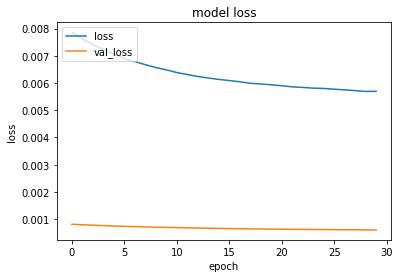

In [45]:
import matplotlib.pyplot as plt

def plot_hist(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    
    plt.legend(['loss', 'val_loss'], loc='upper left')

plot_hist(hist)

# 3. Predition and Recommendation

In [46]:
# Set played game to zero, so that we dont recommend games played
pred_matrix = model.predict(X) * (X[0] == 0)
pred_matrix

array([[-0.0000000e+00, -1.5653569e-02,  0.0000000e+00, ...,
        -2.0153966e-02,  5.1243147e-03,  1.6115192e-02],
       [-5.7767900e-03, -1.5227357e-05,  8.3601652e-03, ...,
        -3.8833683e-03,  5.1971697e-03,  1.0211046e-03],
       [ 8.4954221e-04,  2.7160789e-03, -2.6068544e-02, ...,
        -4.3454440e-03, -8.5958885e-03,  1.6850390e-02],
       ...,
       [ 2.3424178e-03, -3.6835740e-04,  2.8494950e-03, ...,
        -4.0145125e-04, -3.6675087e-04, -2.7746870e-04],
       [ 1.3483204e-03, -4.4689770e-04,  1.8514139e-03, ...,
        -5.3954124e-04, -3.5399850e-04, -1.3373443e-04],
       [ 2.3972588e-03, -2.9750820e-04,  2.9257676e-03, ...,
        -4.6366919e-04, -3.3603376e-04, -6.2670186e-04]], dtype=float32)

In [47]:
# converting the reconstructed matrix back to a Pandas dataframe
df_pred_matrix  = pd.DataFrame(pred_matrix, 
                               columns = df_matrix.columns, 
                               index   = df_matrix.index)
df_pred_matrix.head()

,10,20,30,40,50,60,70,80,100,130,...,9870,9880,9900,9930,9940,9960,9970,9980,9990,10000
0,-0.000000,-0.015654,0.000000,-0.010689,-0.002577,0.001502,0.004189,-0.011329,0.008061,-0.005907,...,0.015449,0.027373,-0.012926,0.035391,0.002068,0.007927,-0.006873,-0.020154,0.005124,0.016115
1,-0.005777,-0.000015,0.008360,0.001439,0.002133,0.002373,-0.000351,-0.000872,-0.020681,0.002970,...,-0.002261,0.002354,-0.010332,-0.008798,0.000000,0.005404,0.010758,-0.003883,0.005197,0.001021
2,0.000850,0.002716,-0.026069,0.003601,0.017209,0.004854,-0.019577,-0.027942,-0.003893,-0.002614,...,-0.002084,-0.008527,-0.012447,0.017117,-0.006475,-0.003262,0.009166,-0.004345,-0.008596,0.016850
3,-0.055999,-0.012386,-0.020053,-0.007521,0.005658,-0.016992,0.029661,0.011697,-0.000949,0.027260,...,0.043550,-0.004850,-0.021177,-0.008968,-0.015214,-0.011878,0.016670,0.001152,0.030458,-0.001940
4,0.000000,0.000000,-0.000000,0.000000,0.000000,0.003539,-0.000000,0.000000,0.000000,-0.000000,...,-0.003079,-0.004279,0.006047,0.018839,0.023664,0.020123,-0.006522,0.007972,-0.026329,0.028966


In [0]:
# user_id = 0
# df_matrix = df_matrix
# df_pred_matrix = df_pred_matrix
# topn = 5
# df_games = df_games

# #Get general scores
# pred_scores = df_pred_matrix.loc[user_id].values #get the user column
# df_scores_all = pd.DataFrame({'score': pred_scores},index = df_matrix.columns.astype(int))

# #First tell user history
# played = df_scores_all[df_scores_all['score'] == 0].index
# df_played_game = df_games.reindex(played)
# df_playtime = pd.DataFrame({'time': df_matrix.loc[user_id].values},index = df_matrix.columns.astype(int))
# df_played_time = df_playtime.reindex(played)
# df_history = pd.merge(df_played_time, df_played_game, left_index=True, right_index=True).sort_values('time', ascending=False)

# print('User played:')
# print(df_history)

# #Then results
# df_scores_unplayed = df_scores_all[df_scores['score'] != 0]  #get rid of played games
# topn = min(len(df_scores_unplayed.index),topn) 
# df_recommend = pd.merge(df_scores_unplayed, df_games.reindex(df_scores.index), left_index=True, right_index=True)

# print('We recommend:')
# print(df_recommend.sort_values('score', ascending=False).head(topn))

In [0]:
def recommendor(user_id, df_matrix, df_pred_matrix, df_games = df_games, topn = 5):
	#Get general scores
	pred_scores = df_pred_matrix.loc[user_id].values #get the user column
	df_scores_all = pd.DataFrame({'score': pred_scores},index = df_matrix.columns.astype(	int))

	#First tell user history
	played = df_scores_all[df_scores_all['score'] == 0].index
	df_played_game = df_games.reindex(played)
	df_playtime = pd.DataFrame({'time': df_matrix.loc[user_id].values},index = 	df_matrix.columns.astype(int))
	df_played_time = df_playtime.reindex(played)
	df_history = pd.merge(df_played_time, df_played_game, left_index=True, 	right_index=True).sort_values('time', ascending=False)
	df_history.index.name = 'game_id'
	print('User played:')
	print(df_history.head(10))
	
	#Then results
	df_scores_unplayed = df_scores_all[df_scores_all['score'] != 0]  #get rid of played games
	topn = min(len(df_scores_unplayed.index),topn) 
	df_recommend = pd.merge(df_scores_unplayed, df_games.reindex(df_scores_unplayed.index), 	left_index=True, right_index=True)
	df_recommend.index.name = 'game_id'
	print('We recommend:')
	print(df_recommend.sort_values('score', ascending=False).head(topn))
    
	return 

In [50]:
recommendor(user_id = 0, df_matrix = df_matrix, df_pred_matrix = df_pred_matrix, topn = 5, df_games = df_games)

User played:
          time                               name                   genres  \
game_id                                                                      
730      23532   Counter-Strike: Global Offensive               ['Action']   
8930     10345        Sid Meier's Civilization® V             ['Strategy']   
1250     10006                      Killing Floor               ['Action']   
300       4733              Day of Defeat: Source               ['Action']   
3590      4413    Plants vs. Zombies GOTY Edition             ['Strategy']   
8190      3083                       Just Cause 2  ['Action', 'Adventure']   
8980      3061                        Borderlands        ['Action', 'RPG']   
6910      2685  Deus Ex: Game of the Year Edition               ['Action']   
8870      2084                  BioShock Infinite               ['Action']   
240       1853             Counter-Strike: Source               ['Action']   

                                                 p

In [49]:
recommendor(user_id = 40000, df_matrix = df_matrix, df_pred_matrix = df_pred_matrix, topn = 5, df_games = df_games)

User played:
          time                              name      genres publisher  \
game_id                                                                  
550      97101                     Left 4 Dead 2  ['Action']     Valve   
730       9201  Counter-Strike: Global Offensive  ['Action']     Valve   
320       2582           Half-Life 2: Deathmatch  ['Action']     Valve   
10         395                    Counter-Strike  ['Action']     Valve   

        developer  price  
game_id                   
550         Valve  19.99  
730         Valve  14.99  
320         Valve   4.99  
10          Valve   9.99  
We recommend:
            score                    name                   genres  \
game_id                                                              
500      0.403974             Left 4 Dead               ['Action']   
1250     0.083276           Killing Floor               ['Action']   
240      0.075729  Counter-Strike: Source               ['Action']   
1900     0.06110